## Case study

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm, geom, ttest_1samp, ttest_ind, ttest_rel, chi2, chisquare, chi2_contingency
from scipy.stats import levene, kruskal, shapiro, f_oneway, pearsonr, spearmanr, poisson, expon
from statsmodels.graphics.gofplots import qqplot

In [2]:
yulu= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089.csv")

In [3]:
yulu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
'''
datetime: datetime
season:
1-spring,
2-summer,
3-fall,
4-winter
holiday: day is holiday (1) or not (0)
working day: day except weekend and holiday (1), if other (0)
weather:
1-Clear, Partlycloudy, few clouds
2-Mist cloudy
3-Light snow, Light rain, scattered clouds, Thundrestorm
4-Heavy rain, Ice pellets, Snow, fog, Mist
temp: temp in deg C
atemp: tempfeels in deg C
humidity: humidity
windspeed: wind speed
casual: nos. of casual users
registered: nos. of registered users
count: total nos. of users
'''

'\ndatetime: datetime\nseason: \n1-spring,\n2-summer,\n3-fall,\n4-winter\nholiday: day is holiday (1) or not (0)\nworking day: day except weekend and holiday (1), if other (0)\nweather: \n1-Clear, Partlycloudy, few clouds\n2-Mist cloudy\n3-Light snow, Light rain, scattered clouds, Thundrestorm\n4-Heavy rain, Ice pellets, Snow, fog, Mist\ntemp: temp in deg C\natemp: tempfeels in deg C\nhumidity: humidity\nwindspeed: wind speed\ncasual: nos. of casual users\nregistered: nos. of registered users\ncount: total nos. of users\n'

In [5]:
yulu= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089.csv", parse_dates= [0], dayfirst= True)

In [6]:
yulu.info()
# convert 0th column into datetime stamp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## EDA

In [7]:
yulu.shape
print("No. of rows: ", yulu.shape[0])
print("No. of Columns: ", yulu.shape[1])

No. of rows:  10886
No. of Columns:  12


In [8]:
yulu.isna().sum()
# No missing values are present in dataset

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
yulu[yulu.duplicated()].shape
# Empty Table i.e. NO duplicacy

(0, 12)

In [10]:
yulu["season"].value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [11]:
yulu["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [12]:
yulu["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [13]:
yulu["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [14]:
#Try to get in structured way/ design a code for this!
categorical_col= ["season","holiday","workingday","weather"]
for i in categorical_col:
  print("column:", i)
  print("unique:", yulu[i].unique())
  print("values:", "\n",yulu[i].value_counts(),"\n")

column: season
unique: [1 2 3 4]
values: 
 4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64 

column: holiday
unique: [0 1]
values: 
 0    10575
1      311
Name: holiday, dtype: int64 

column: workingday
unique: [0 1]
values: 
 1    7412
0    3474
Name: workingday, dtype: int64 

column: weather
unique: [1 2 3 4]
values: 
 1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64 



In [15]:
yulu["year"]= yulu["datetime"].dt.year

In [16]:
yulu["year"].value_counts()
# Data is for two years 2011 and 2012 only

2012    5464
2011    5422
Name: year, dtype: int64

In [17]:
'''yulu["month"]= yulu["datetime"].dt.month
Not useful bcoz it added january count of 2011 and 2012.
'''

'yulu["month"]= yulu["datetime"].dt.month\nNot useful bcoz it added january count of 2011 and 2012.\n'

In [18]:
yulu["month-year"]= yulu["datetime"].dt.to_period("M")
# new step to learn

In [19]:
yulu.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month-year
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,2011-01


In [20]:
yulu= yulu.drop(columns=["year"])
yulu.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month-year
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01


In [21]:
# revenue is associated to "count"- check various factors which affects "total count"

In [22]:
yulu_season= yulu.groupby(["season"])["count"].aggregate(["sum"])
yulu_season

,sum
season,
1,312498
2,588282
3,640662
4,544034


<Axes: xlabel='season', ylabel='count'>

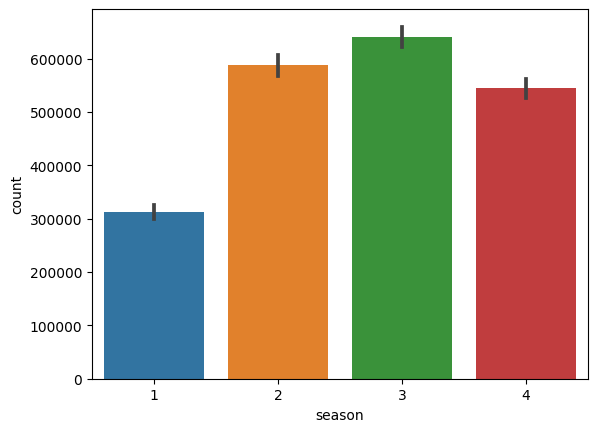

In [23]:
sns.barplot(data= yulu, x= "season", y= "count", estimator= np.sum)

"Spring" observe least number of users and other seasons seems to have better users with "fall" as maximum.

<Axes: xlabel='holiday', ylabel='count'>

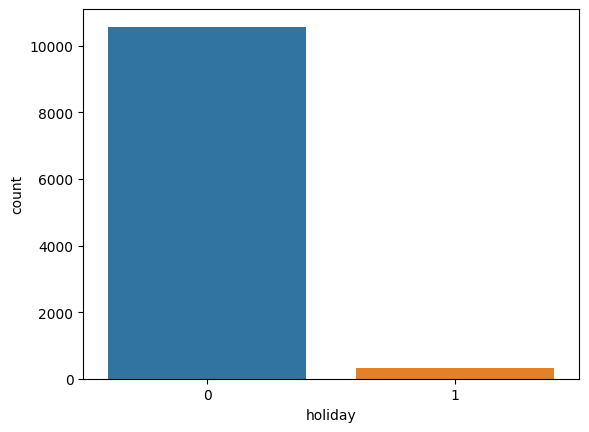

In [24]:
sns.countplot(data= yulu, x= "holiday")
# This needs Hypothesis Testing for confirmation/ backsupport

## Outlier Detection and Treatment

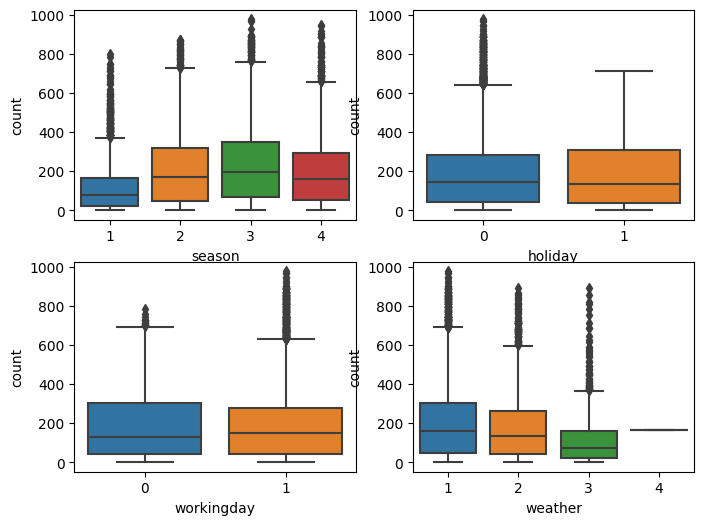

In [25]:
# Outlier Detection and Treatment
plt.figure(figsize= (8,6))
plt.subplot(2,2,1)
sns.boxplot(data= yulu, x="season", y= "count")

plt.subplot(2,2,2)
sns.boxplot(data= yulu, x="holiday", y="count")

plt.subplot(2,2,3)
sns.boxplot(data= yulu, x="workingday", y="count")

plt.subplot(2,2,4)
sns.boxplot(data= yulu, x="weather", y="count")
plt.show()

<ipython-input-26-e69bff43d3d8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(yulu.corr(), annot=True, cmap= "copper_r")


<Axes: >

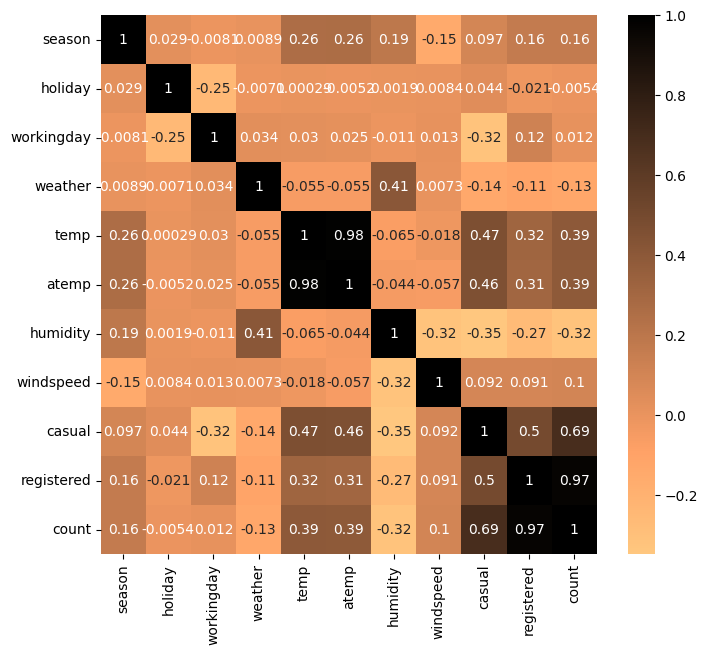

In [26]:
# Before start of outlier removal lets check correlation between columns.
plt.figure(figsize=(8,7))
sns.heatmap(yulu.corr(), annot=True, cmap= "copper_r")
# temp-atemp, registered-count-casual

In [27]:
# plt.colormaps() - used to check the available colors

In [28]:
yulu.drop(columns=["casual","registered","atemp"], inplace= True)
yulu.head()
# To reduce the noise/ irrelevent data clustering

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,month-year
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,2011-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,2011-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32,2011-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13,2011-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1,2011-01


In [29]:
# drop the Outliers from the list
p_25_s= np.percentile(yulu["count"], 25)
p_75_s= np.percentile(yulu["count"], 75)
IQR_s= p_75_s - p_25_s
upper_s= p_75_s + 1.5*IQR_s
yulu_outliers= yulu[yulu["count"] > upper_s]
len(yulu_outliers)*100/len(yulu)

2.75583318023149

In [30]:
yulu = yulu[yulu["count"] < upper_s]
yulu

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,month-year
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0000,16,2011-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0000,40,2011-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0000,32,2011-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0000,13,2011-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0000,1,2011-01
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,50,26.0027,336,2012-12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,57,15.0013,241,2012-12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,61,15.0013,168,2012-12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,61,6.0032,129,2012-12


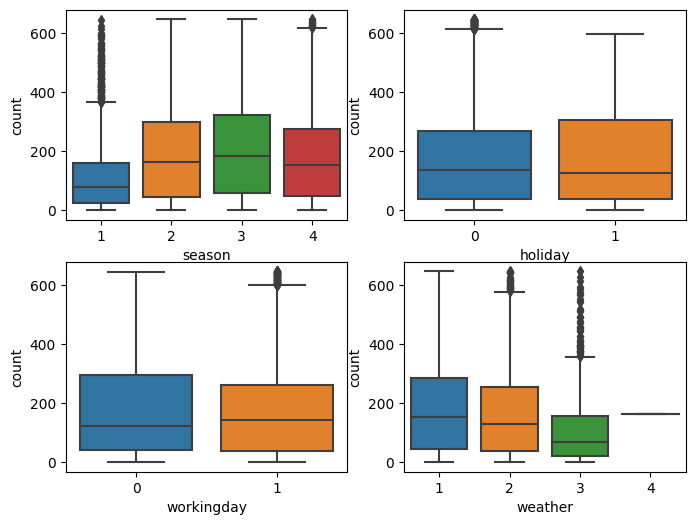

In [31]:
plt.figure(figsize= (8,6))
plt.subplot(2,2,1)
sns.boxplot(data= yulu, x="season", y= "count")

plt.subplot(2,2,2)
sns.boxplot(data= yulu, x="holiday", y="count")

plt.subplot(2,2,3)
sns.boxplot(data= yulu, x="workingday", y="count")

plt.subplot(2,2,4)
sns.boxplot(data= yulu, x="weather", y="count")
plt.show()

## Hypothesis Testing

In [32]:
categorical_col

['season', 'holiday', 'workingday', 'weather']

In [33]:
'''
season has 4 categories
holiday has 2 categories
workingday has 2 categories
weather has 4 categories
So:
1. "Ttest" on holiday and workingday
2. "ANOVA or Kruskal" on weather and season
'''

'\nseason has 4 categories\nholiday has 2 categories\nworkingday has 2 categories\nweather has 4 categories\nSo:\n1. "Ttest" on holiday and workingday\n2. "ANOVA or Kruskal" on weather and season\n'

In [34]:
# Holiday = {0,1}
'''
H0: Holiday has No effect on Count/ Demand of bikes are independent of Holidays
Ha: Demand of bikes are dependent on Holidays/ It effects

Now this effect is greater or less?
'''

'\nH0: Holiday has No effect on Count/ Demand of bikes are independent of Holidays\nHa: Demand of bikes are dependent on Holidays/ It effects\n\nNow this effect is greater or less?\n'

In [35]:
yulu.groupby("holiday")["count"].describe()
# holiday=1 has greater "mu" then holiday=0

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10274.0,175.372786,155.950275,1.0,40.0,138.0,269.0,646.0
1,309.0,182.588997,163.766590,1.0,38.0,127.0,304.0,597.0


In [63]:
#H0: Holiday has No effect on Count/ Demand of bikes are independent of Holiday
#Ha: Demand of bikes are dependent on Holiday/ more bikes are used on holiday wrt no holiday
alpha= 0.05
holiday_booking= yulu.loc[yulu["holiday"]==1]["count"].sample(300)
Noholiday_booking= yulu.loc[yulu["holiday"]==0]["count"].sample(300)
ttest_stat, p_value= ttest_ind(holiday_booking, Noholiday_booking, equal_var= False, alternative= "greater")
print(p_value)

if p_value < alpha:
  print("reject H0\n Demand of bikes are depends on holiday")
else:
  print("Fail to reject H0\n Demand of bikes are independents of holiday")

0.350606514150013
Fail to reject H0
 Demand of bikes are independents of holiday


In [37]:
# Workingday = {0,1}
yulu.groupby("workingday")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3422.0,180.965517,163.782166,1.0,43.0,124.0,295.75,645.0
1,7161.0,173.011591,152.358993,1.0,38.0,143.0,262.00,646.0


In [62]:
#H0: Workingday has No effect on Count/ Demand of bikes are independent of workingday
#Ha: Demand of bikes are dependent on workingday/ less bikes are used on workingday wrt offday
alpha= 0.05
workingday_booking= yulu.loc[yulu["workingday"]==1]["count"].sample(3200)
Offday_booking= yulu.loc[yulu["workingday"]==0]["count"].sample(3200)
ttest_stat, p_value= ttest_ind(workingday_booking, Offday_booking, equal_var= False, alternative= "less")
print(p_value)

if p_value < alpha:
  print("reject H0\n Demand of bikes are depends on workingday")
else:
  print("Fail to reject H0\n Demand of bikes are independents of workingday")

0.058156909283234
Fail to reject H0
 Demand of bikes are independents of workingday


In [39]:
# season = {1,2,3,4}/ 04 categories/ ANOVA Test
# Check for assumptions- Normality and equal variance
yulu.groupby("season")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2670.0,112.795131,116.884929,1.0,24.00,78.0,161.00,644.0
2,2633.0,195.653627,166.170802,1.0,45.00,165.0,299.00,646.0
3,2616.0,210.484327,164.055532,1.0,59.75,185.0,323.25,646.0
4,2664.0,184.404655,154.563069,1.0,48.75,154.0,276.25,646.0


In [40]:
spring_booking= yulu.loc[yulu["season"]==1]["count"].sample(2500)
summer_booking= yulu.loc[yulu["season"]==2]["count"].sample(2500)
fall_booking= yulu.loc[yulu["season"]==3]["count"].sample(2500)
winter_booking= yulu.loc[yulu["season"]==4]["count"].sample(2500)

'\nqqplot(spring_booking, line="s")\nqqplot(winter_booking, line="s")\nqqplot(summer_booking, line="s")\n'

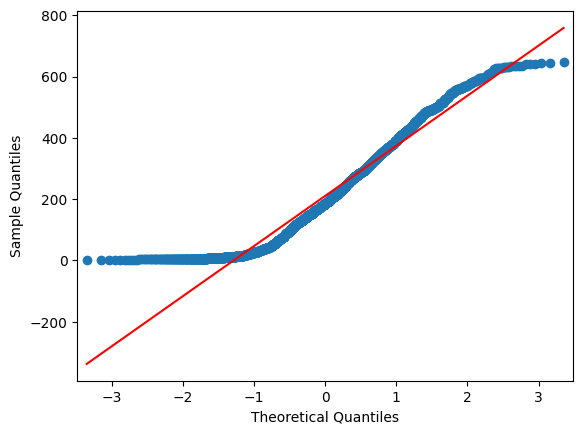

In [41]:
# To check normal distribution
qqplot(fall_booking, line="s")
'''
qqplot(spring_booking, line="s")
qqplot(winter_booking, line="s")
qqplot(summer_booking, line="s")
'''

In [42]:
# Assumptions are failed- ANOVA can't use

In [43]:
# To check equal variance
levene(spring_booking, fall_booking, summer_booking, winter_booking)
# Variance are different due to p_value<0.05 i.e. reject H0(Have equal variance).

LeveneResult(statistic=169.71439199307605, pvalue=2.5701862777109518e-107)

In [44]:
f_stat, p_value= kruskal(spring_booking, fall_booking, summer_booking, winter_booking)
if p_value < alpha:
  print("reject H0\n Dependency of Demand of bikes on season")
else:
  print("Fail to reject H0\n independent demand and season")

reject H0
 Dependency of Demand of bikes on season


In [45]:
# weather  = {1,2,3,4}/ 04 categories/ ANOVA Test
# Check for assumptions- Normality and equal variance
yulu.groupby("weather")["count"].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,6962.0,187.131140,161.333785,1.0,45.0,153.0,286.0,646.0
2,2770.0,166.117690,146.992422,1.0,39.0,130.0,254.0,646.0
3,850.0,111.862353,121.233389,1.0,23.0,70.5,157.0,646.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


In [46]:
# We can ignore 4th one
clear_booking= yulu.loc[yulu["weather"]==1]["count"].sample(800)
cloudy_booking= yulu.loc[yulu["weather"]==2]["count"].sample(800)
Rainy_booking= yulu.loc[yulu["weather"]==3]["count"].sample(800)

In [47]:
# Check for the normality by using Shapiro test.
test_stats, p_value= shapiro(yulu["count"])
print(p_value, test_stats)

0.0 0.9020081162452698


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [48]:
# Again reject the null hypothesis i.e. Ha: Non-Gaussian distribution
f_stat, p_value= kruskal(clear_booking, cloudy_booking, Rainy_booking)
if p_value < alpha:
  print("reject H0\n Dependency of Demand of bikes on weather")
else:
  print("Fail to reject H0\n independent demand and weather")

reject H0
 Dependency of Demand of bikes on weather


## Weather dependency on Season

In [51]:
# Two catagorical analysis i.e. use of chi2_contingency test
# H0: season and weather are independent
# Ha: season and weather are dependent
contingency_Table= pd.crosstab(yulu["season"], yulu["weather"])
chistat, p_value,dof, exp_freq= chi2_contingency(contingency_Table)
contingency_Table

weather,1,2,3,4
season,,,,
1,1744,714,211,1
2,1720,690,223,0
3,1842,579,195,0
4,1656,787,221,0


In [52]:
print(p_value)
if p_value < alpha:
  print("reject H0\n season and weather are dependent")
else:
  print("Fail to reject H0\n season and weather has no within relation")

3.6550317439064943e-07
reject H0
 season and weather are dependent


In [55]:
# To better understanding rename the seasons and weathers
dict1= {1: "clear",
        2: "mist+cloud",
        3: "Rain",
        4: "Heavy rainfall"}
yulu["weather_chintu"]=yulu["weather"].map(dict1)

dict2= {1: "spring",
        2: "summer",
        3: "fall",
        4: "winter"}
yulu["season_chintu"]=yulu["season"].map(dict2)

In [56]:
contingency_Table_imp= pd.crosstab(yulu["weather_chintu"], yulu["season_chintu"])
contingency_Table_imp

season_chintu,fall,spring,summer,winter
weather_chintu,,,,
Heavy rainfall,0,1,0,0
Rain,195,211,223,221
clear,1842,1744,1720,1656
mist+cloud,579,714,690,787


<Axes: xlabel='weather_chintu'>

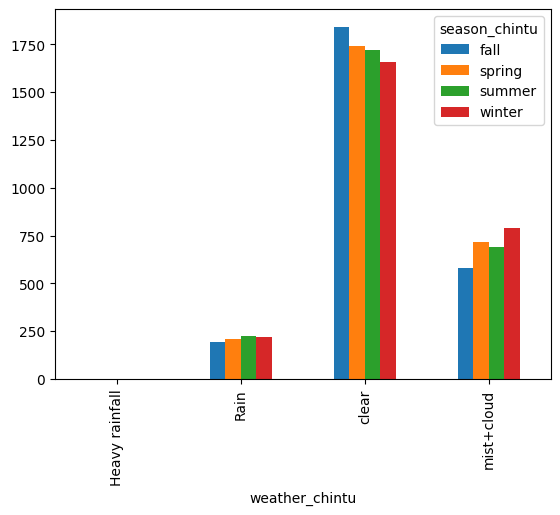

In [59]:
contingency_Table_imp.plot(kind="bar")

In [49]:
yulu.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,count,month-year
0,2011-01-01 00:00:00,1,0,0,1,9.84,81,0.0,16,2011-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,80,0.0,40,2011-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,80,0.0,32,2011-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,75,0.0,13,2011-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,75,0.0,1,2011-01
